1. Data ingestion 
2. EDA of the data
3. Processing of the data
4. model building 
5. model evalution

# Data Ingestion : 

- Import the required libraries: such as pandas,numpy,matplotlib,seaborn, etc.
- Load the data 
- Load the Time Series Data into a pandas dataframe 
- Set the datetime columns as the index of the dataframe 
- Check the data type of the index and convert it to datetime if necessary.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 



In [2]:
data = pd.read_csv("TSLA.CSV")

In [3]:
data 

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


In [4]:
# univariate time series 
stock_data = data  [["Close", "Date"]]

In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   758 non-null    float64
 1   Date    758 non-null    object 
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [6]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"])

C:\Users\Gaurang\AppData\Local\Temp\ipykernel_4380\1075770006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"] = pd.to_datetime(stock_data["Date"])


In [7]:


stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   758 non-null    float64       
 1   Date    758 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [8]:
stock_data = stock_data.set_index("Date")

<AxesSubplot:xlabel='Date'>

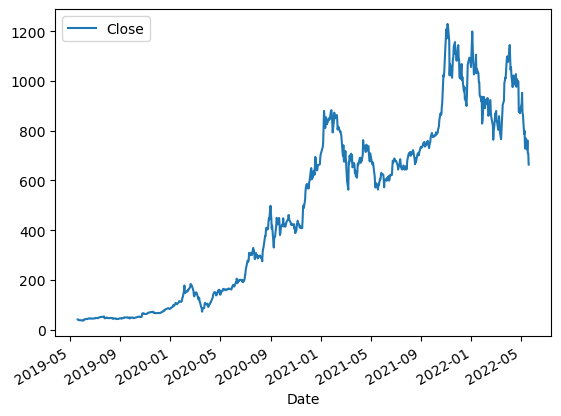

In [9]:
stock_data.plot()

# why we are converting date column as index columns 

1. visulization is also simple 
2. scipy and stas model has been design in such a  way required date columns 


# EDA( Exploratory data analysis)
1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

In [10]:
stock_data.describe() .T

,count,mean,std,min,25%,50%,75%,max
Close,758.0,485.531513,353.160353,35.793999,112.3235,488.125,762.142502,1229.910034


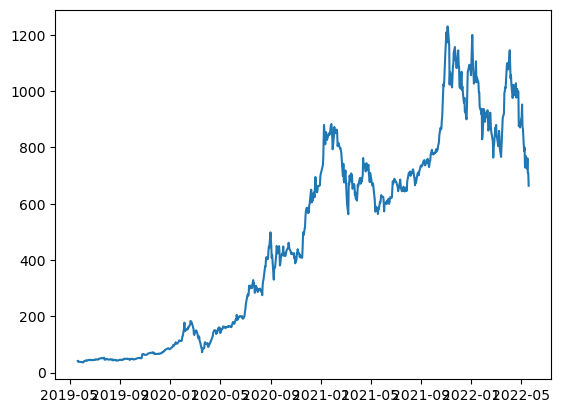

In [11]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

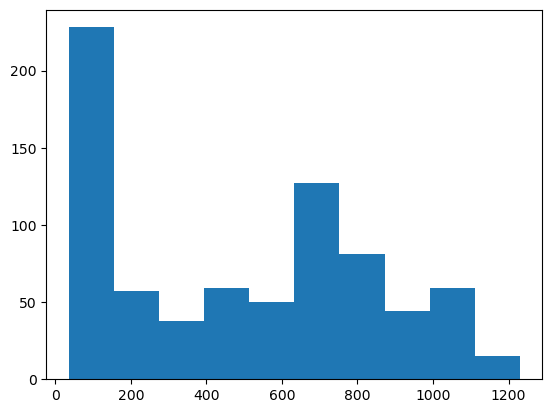

In [12]:
plt.hist(stock_data.Close)

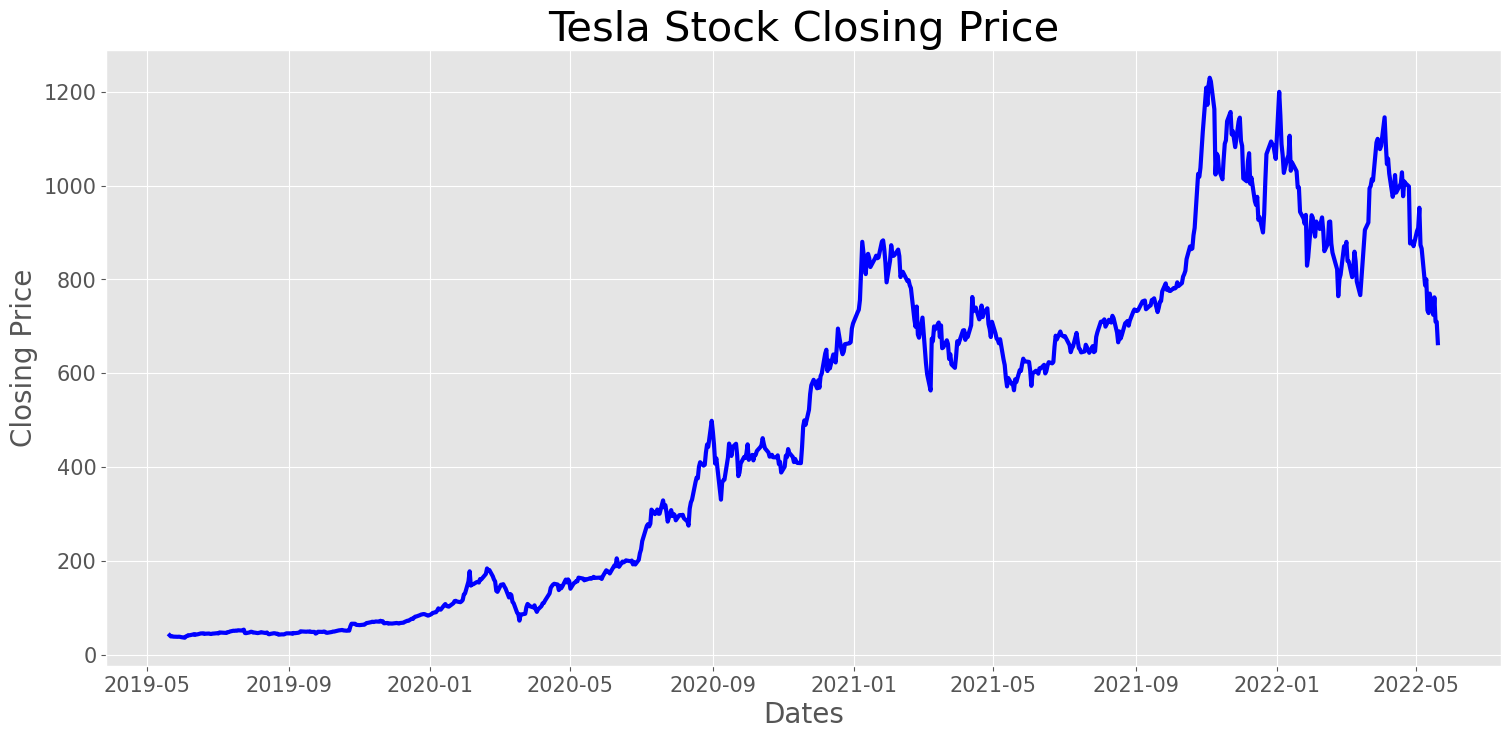

In [13]:
# plotting close price
plt.style.use('ggplot') # stype ggplot
plt.figure(figsize=(18,8))   # fig size
plt.grid(True)     # to print grid
plt.xlabel('Dates', fontsize = 20)   # xlabel
plt.ylabel('Closing Price', fontsize = 20) #ylabel 
plt.xticks(fontsize = 15)   #x-axis ticks font
plt.yticks(fontsize = 15)
plt.plot(stock_data.Close, linewidth=3 , color = "blue")  # plot the data
plt.title("Tesla Stock Closing Price", fontsize = 30)  # title of the graph 
plt.show()

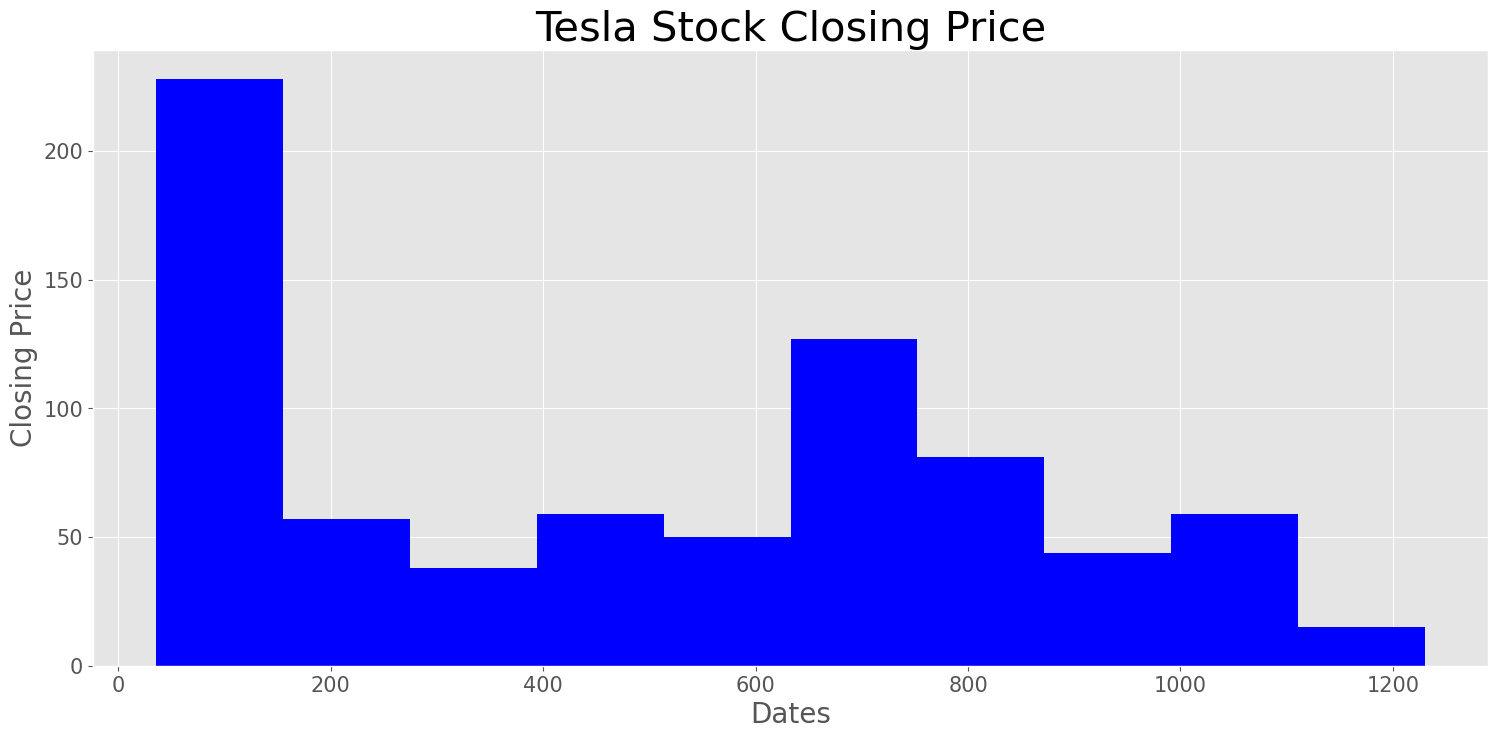

In [14]:
# plotting close price
plt.style.use('ggplot') # stype ggplot
plt.figure(figsize=(18,8))   # fig size
plt.grid(True)     # to print grid
plt.xlabel('Dates', fontsize = 20)   # xlabel
plt.ylabel('Closing Price', fontsize = 20) #ylabel 
plt.xticks(fontsize = 15)   #x-axis ticks font
plt.yticks(fontsize = 15)
plt.hist(stock_data.Close, linewidth=3 , color = "blue")  # plot the histogram
plt.title("Tesla Stock Closing Price", fontsize = 30)  # title of the graph 
plt.show()

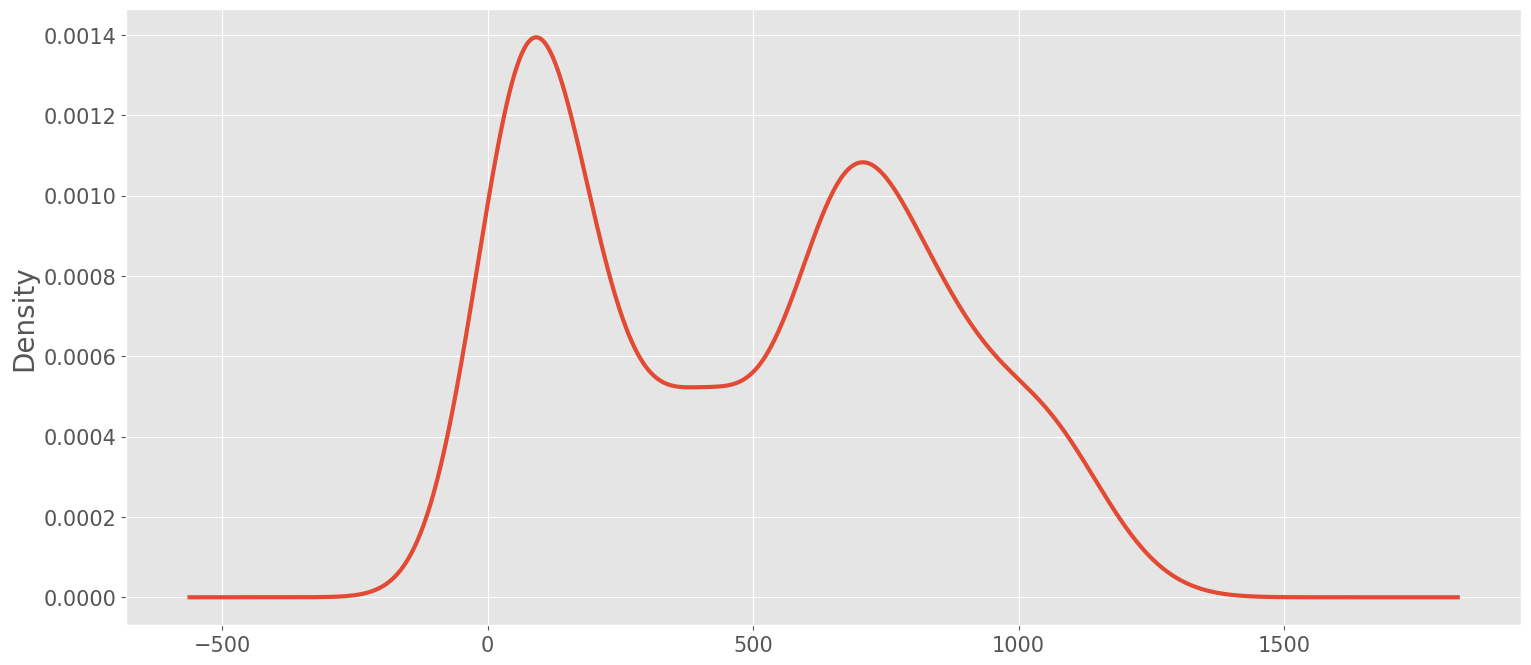

In [15]:
df_close = stock_data.Close
df_close.plot(kind = "kde", figsize = (18,8) , linewidth = 3)
plt.grid("both")
plt.ylabel('Density', fontsize = 20) #ylabel 
plt.xticks(fontsize = 15)   #x-axis ticks font
plt.yticks(fontsize = 15)
plt.show()



In [16]:
# checking rolling mean and rolling standard daviation 


rolmean = stock_data.Close.rolling(48).mean()


rolstd = stock_data.Close.rolling(48).std()






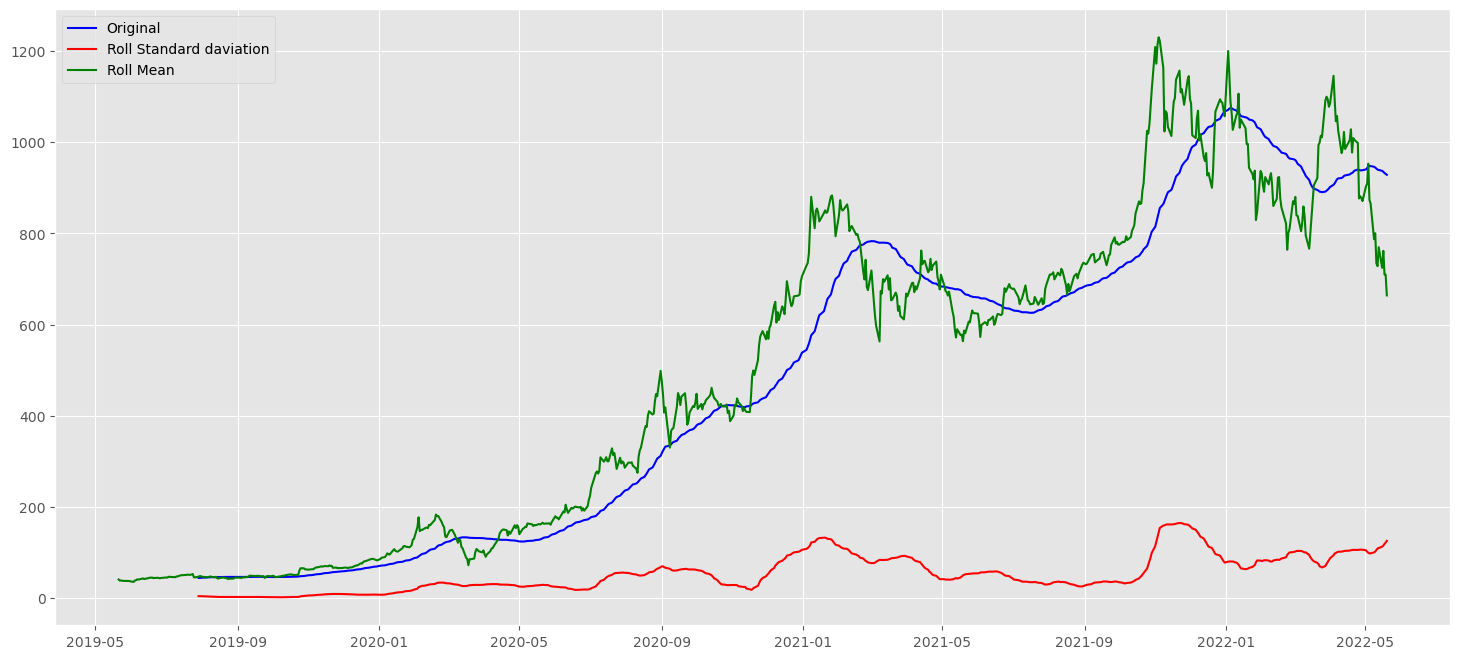

In [17]:
plt.style.use('ggplot') # stype ggplot
plt.figure(figsize=(18,8))   # fig size
plt.grid(True)
plt.plot(rolmean , color = "blue" , label = "Original")
plt.plot(rolstd, color = "red", label = "Roll Standard daviation")
plt.plot(stock_data.Close , color = "green", label = "Roll Mean")
# plotting close price
plt.legend()
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on stock_data.Close
adft = adfuller(stock_data.Close)

# Extract the result values
adf_statistic = adft[0]        # ADF statistic
p_value = adft[1]              # p-value
used_lag = adft[2]            # Number of lags used in the regression
n_observation = adft[3]       # Number of observations used in the test
critical_values = adft[4]     # Critical values for different significance levels

# Print the results
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Number of Lags Used: {used_lag}')
print(f'Number of Observations Used: {n_observation}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')


ADF Statistic: -1.363008581703749
p-value: 0.5998762543050697
Number of Lags Used: 9
Number of Observations Used: 748
Critical Values:
   1%: -3.43912257105195
   5%: -2.8654117005229844
   10%: -2.568831705010152



- If the p-value (p) is less than or equal to your chosen significance level (usually denoted as α, often set at 0.05), you reject the null hypothesis. This means you have evidence to suggest that your data is stationary.

- If the p-value (p) is greater than your chosen significance level (α), you fail to reject the null hypothesis. This means you do not have sufficient evidence to conclude that your data is stationary.

So, in the context of the ADF test:

- If p ≤ 0.05, you reject the null hypothesis that your data is non-stationary, suggesting that your data is stationary.

- If p > 0.05, you fail to reject the null hypothesis that your data is non-stationary, indicating that your data may not be stationary

In [19]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

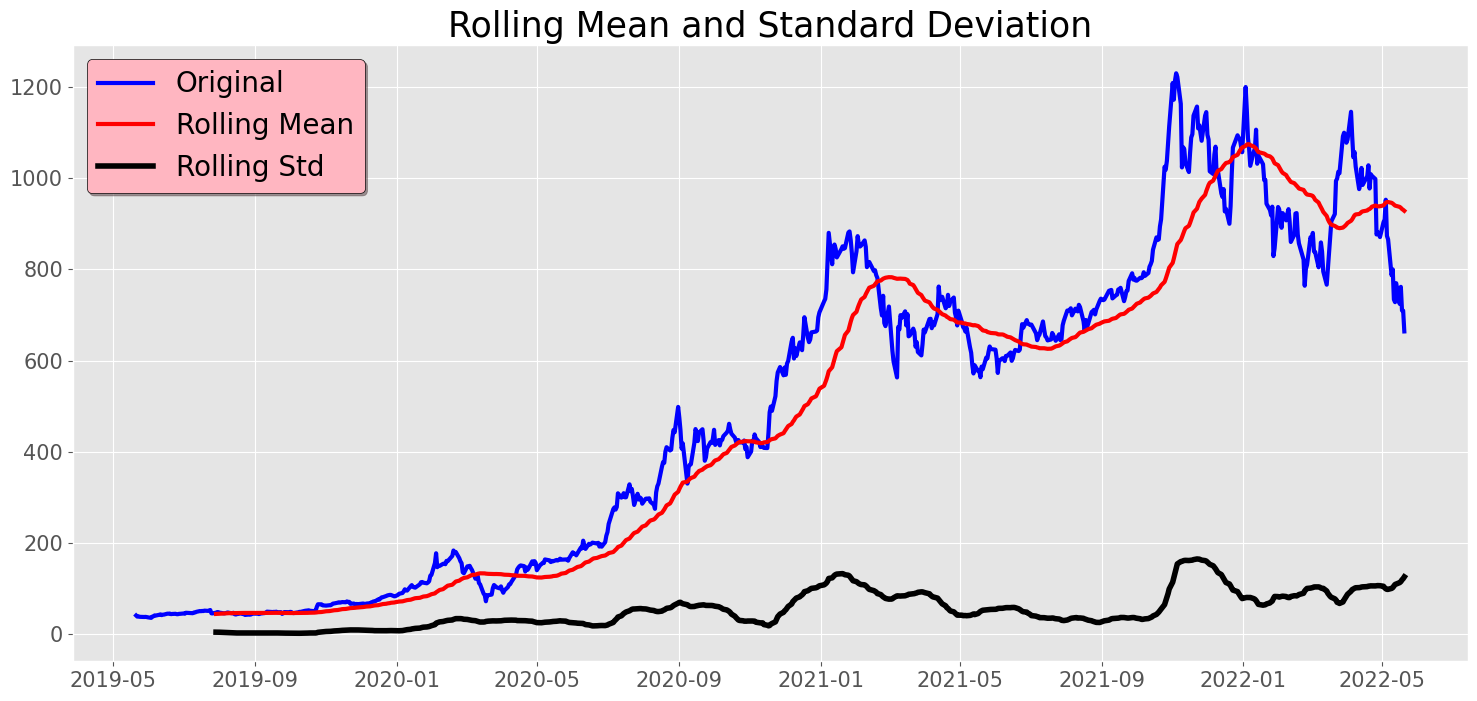

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [20]:
test_stationarity(stock_data.Close)

# Decomposition of the data 

In [21]:
# additive model by default 
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data.Close, period = 12)

<Figure size 2000x1000 with 0 Axes>

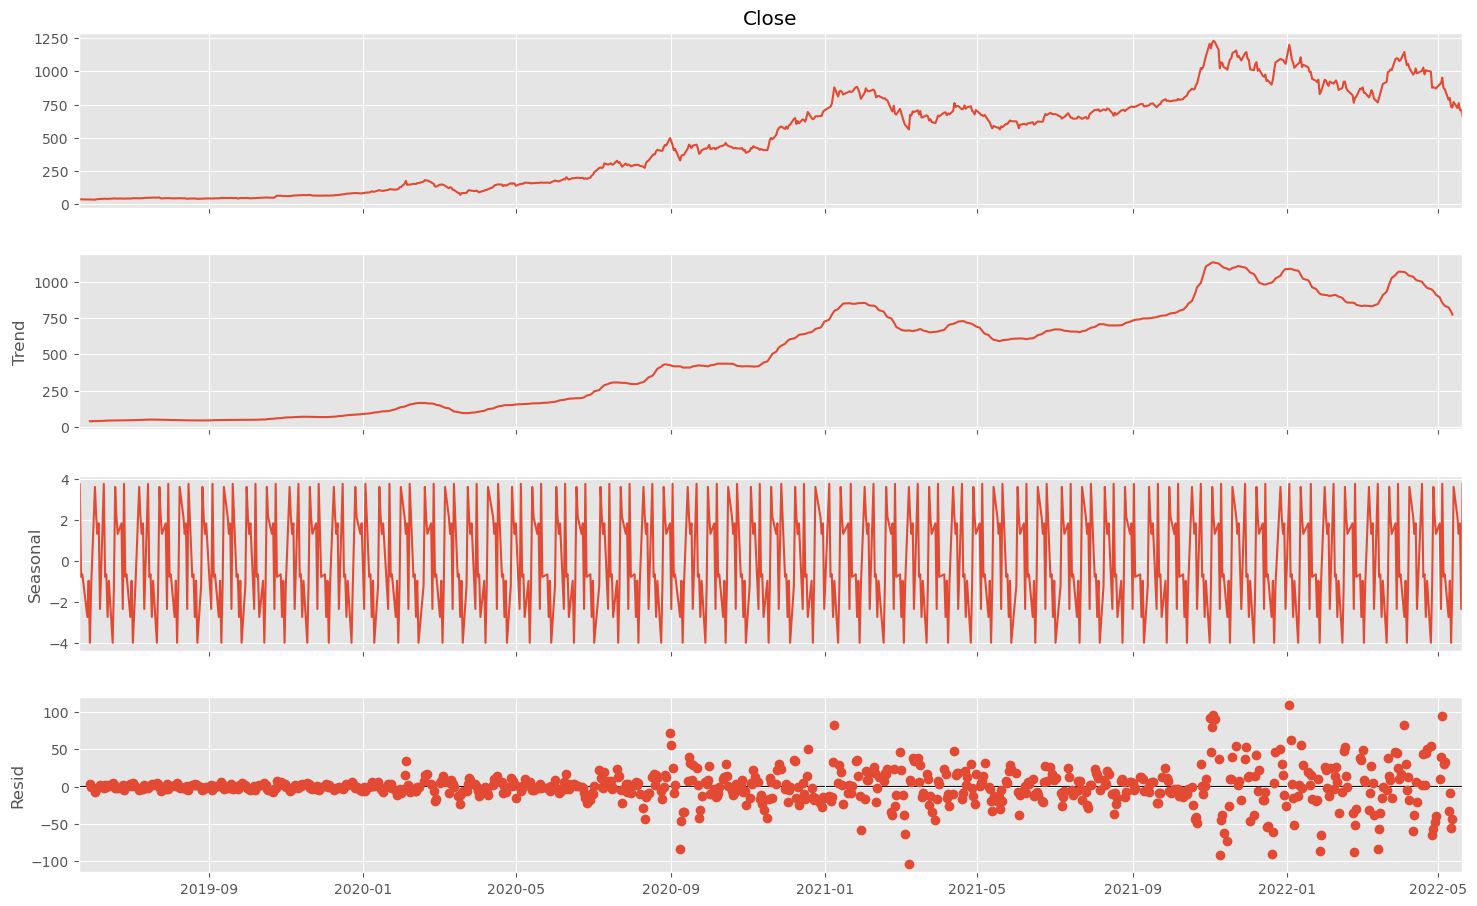

In [22]:
fig = plt.figure(figsize = (20,10))
fig = result.plot()
fig.set_size_inches(17,10)

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
result1 = seasonal_decompose(stock_data.Close, period = 12, model = "multiplicative")

<Figure size 2000x1000 with 0 Axes>

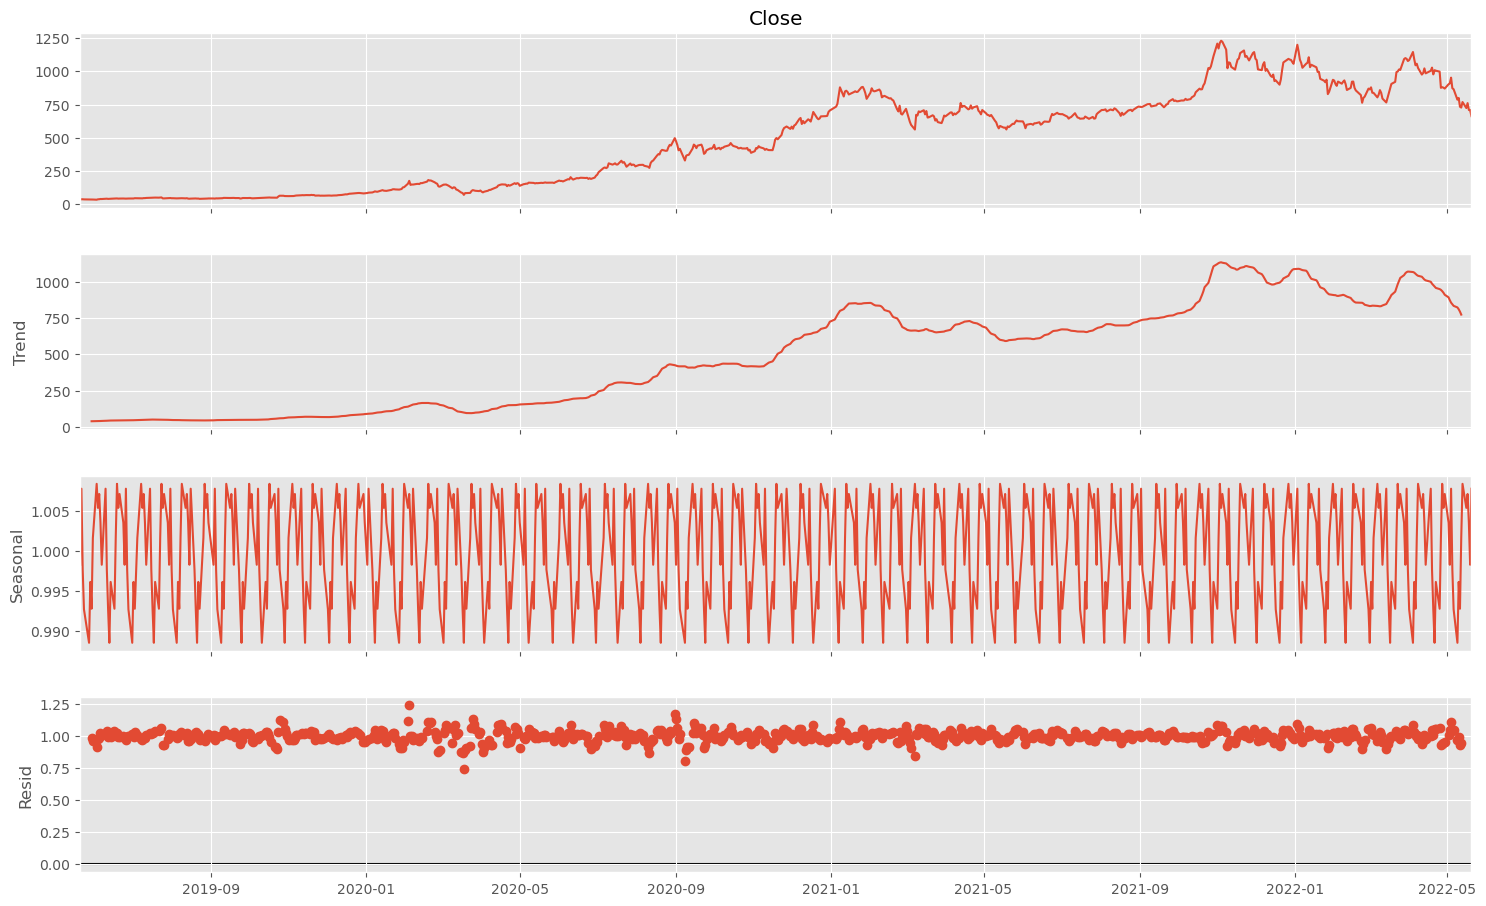

In [24]:
fig = plt.figure(figsize = (20,10))
fig = result1.plot()
fig.set_size_inches(17,10)

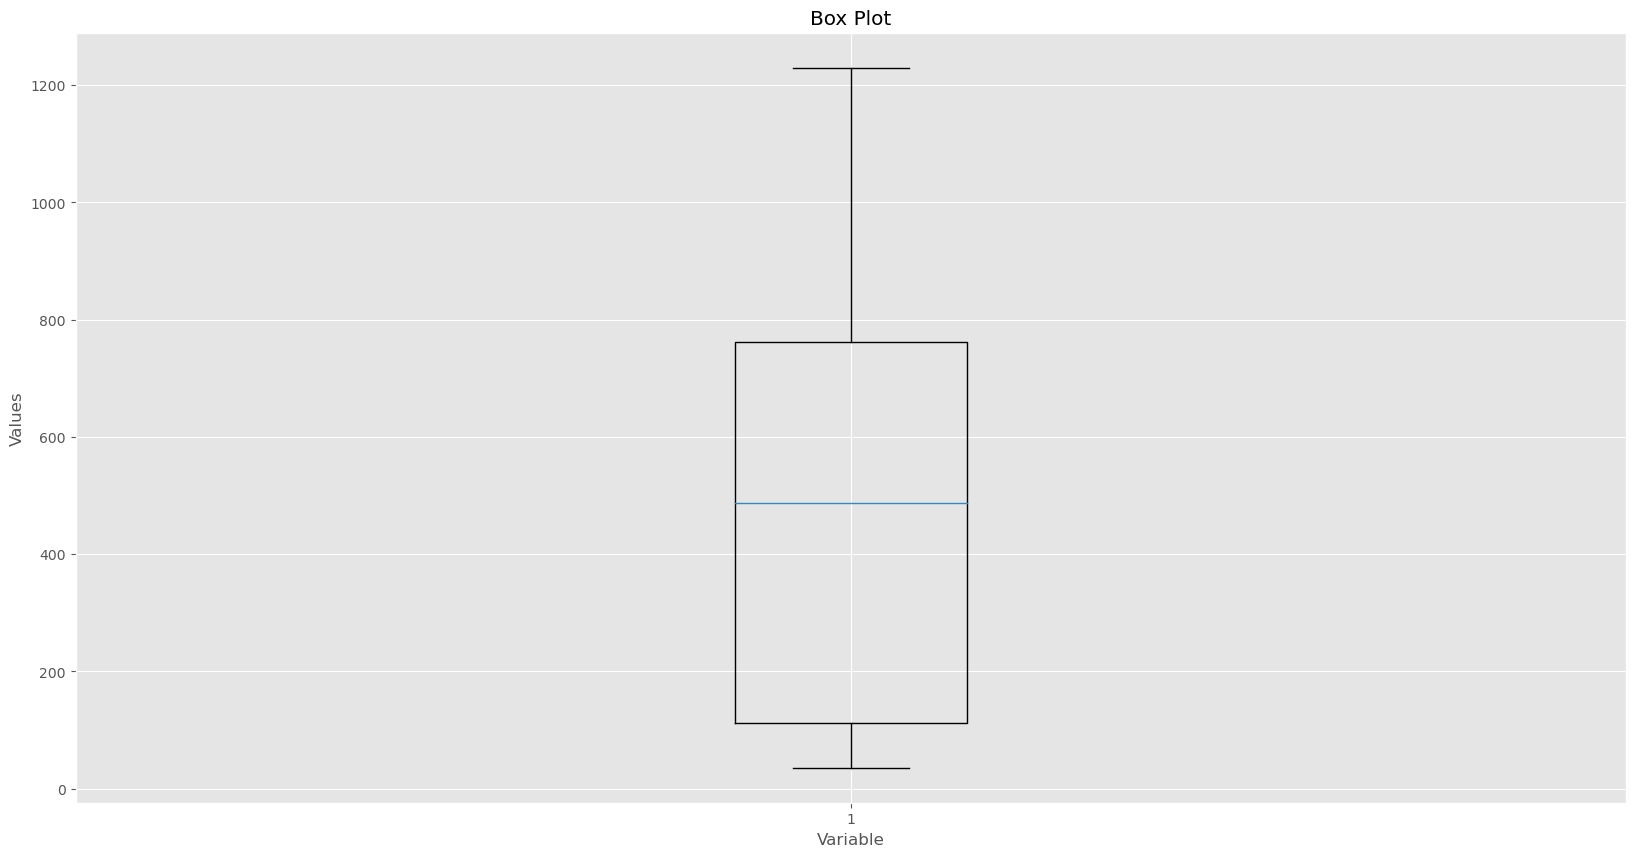

In [25]:
plt.subplots(figsize=(20,10))
plt.boxplot(stock_data.Close)
plt.xlabel('Variable')
plt.ylabel('Values')
plt.title('Box Plot')
plt.show()



# Auto Correlation and Partial Correlation function 

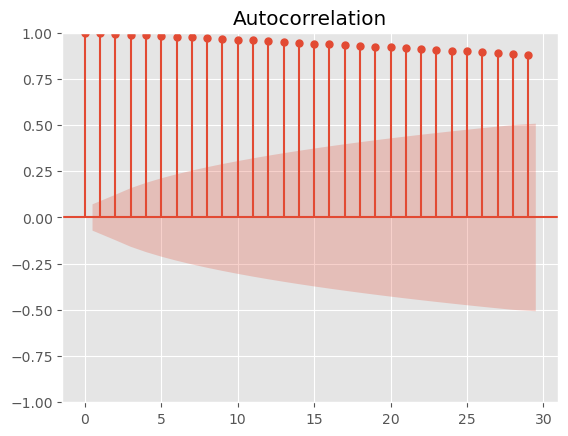

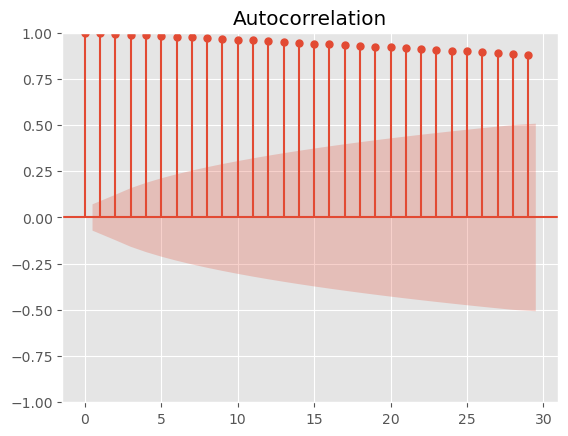

In [26]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

plot_acf(stock_data.Close)


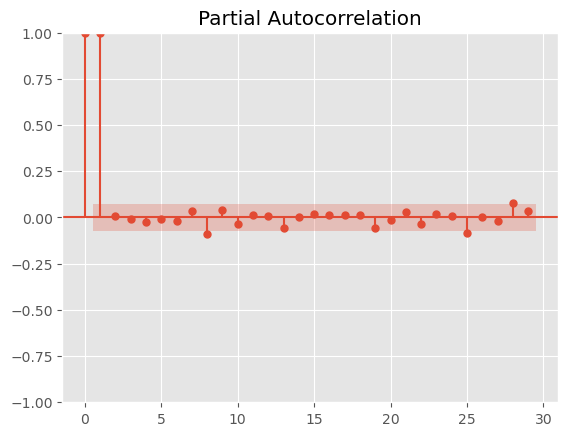

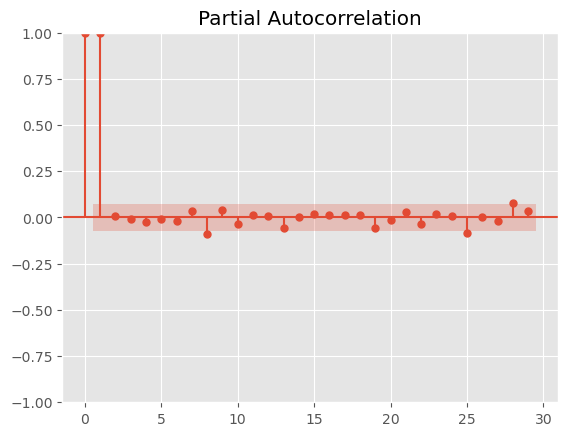

In [27]:
plot_pacf(stock_data.Close)

# Preprocessing of the data

- fill the missing values (here we do not required)
- Convert data into the stationary time series
- If necessary then normalise the data(here we do not required)
- Split the data into train and test 
- Clean the data by removing the outliers

In [28]:
df_close = stock_data["Close"]

In [29]:
df_close = df_close.diff()
df_close = df_close.dropna()

In [30]:
df_close

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

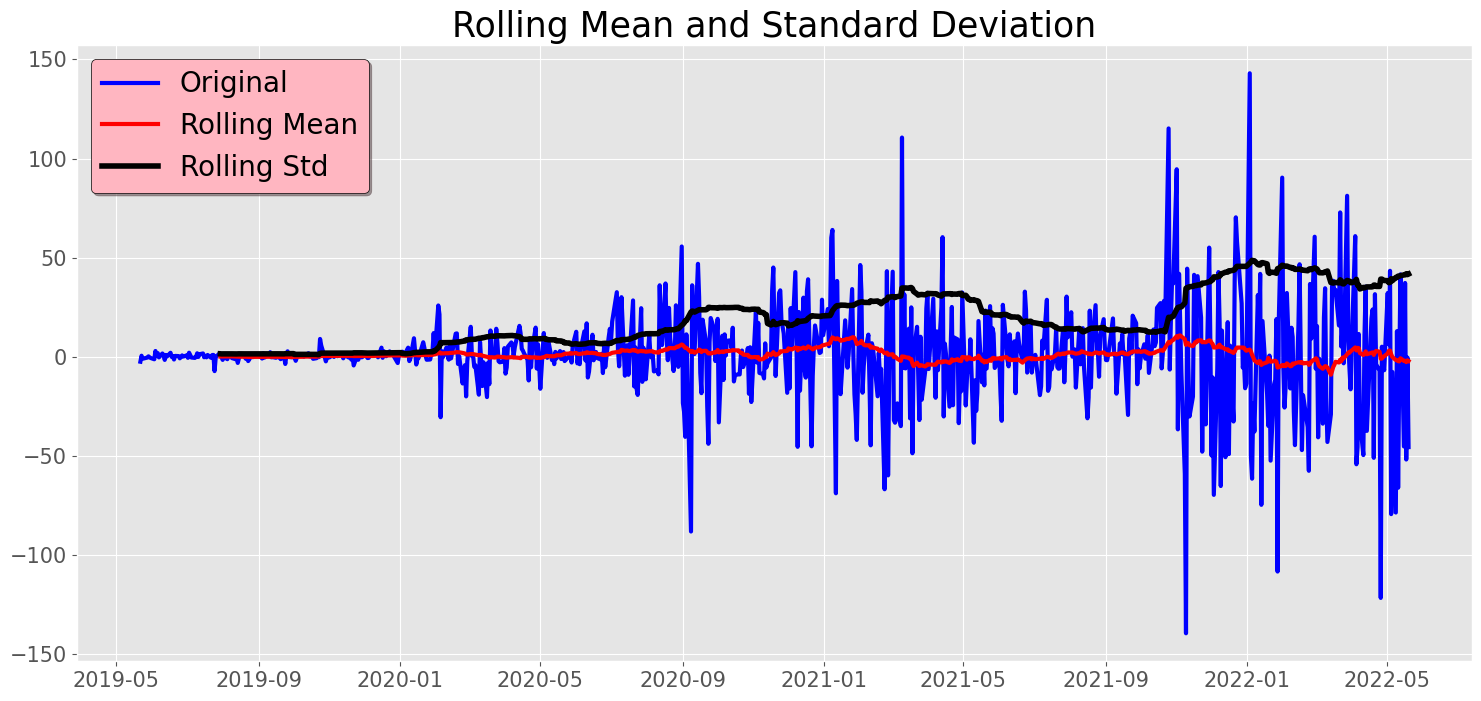

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [31]:
test_stationarity(df_close)

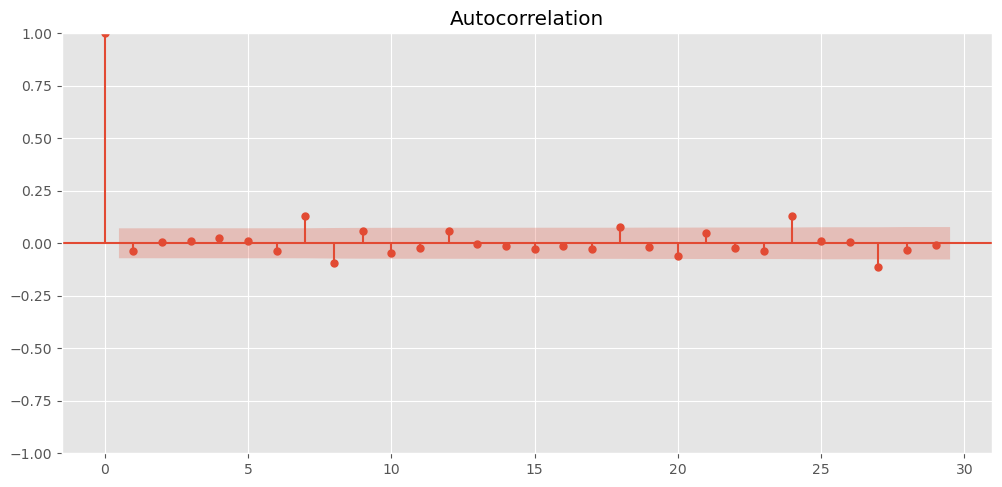

In [32]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_close, ax=ax1)


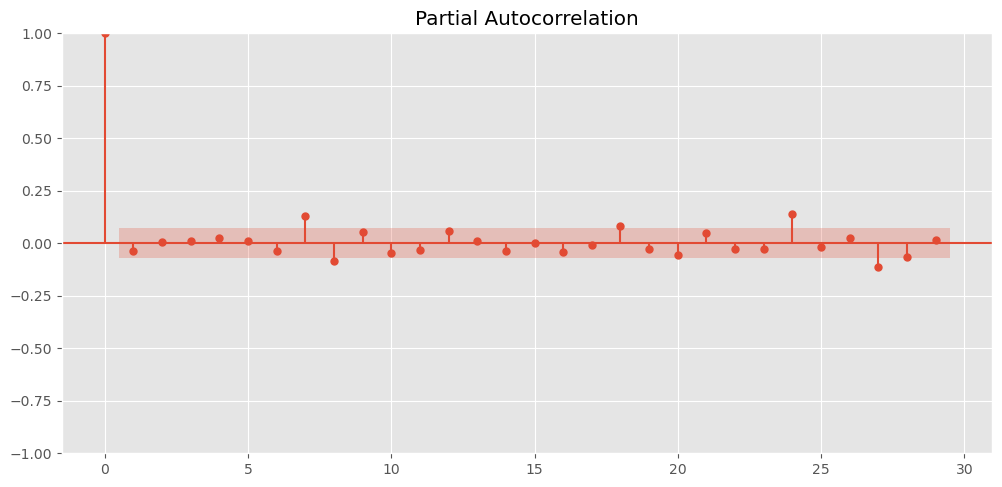

In [33]:
fig = plt.figure(figsize=(12,12))
ax2 = fig.add_subplot(211)
fig = plot_pacf(df_close, ax=ax2)

### Train Test split

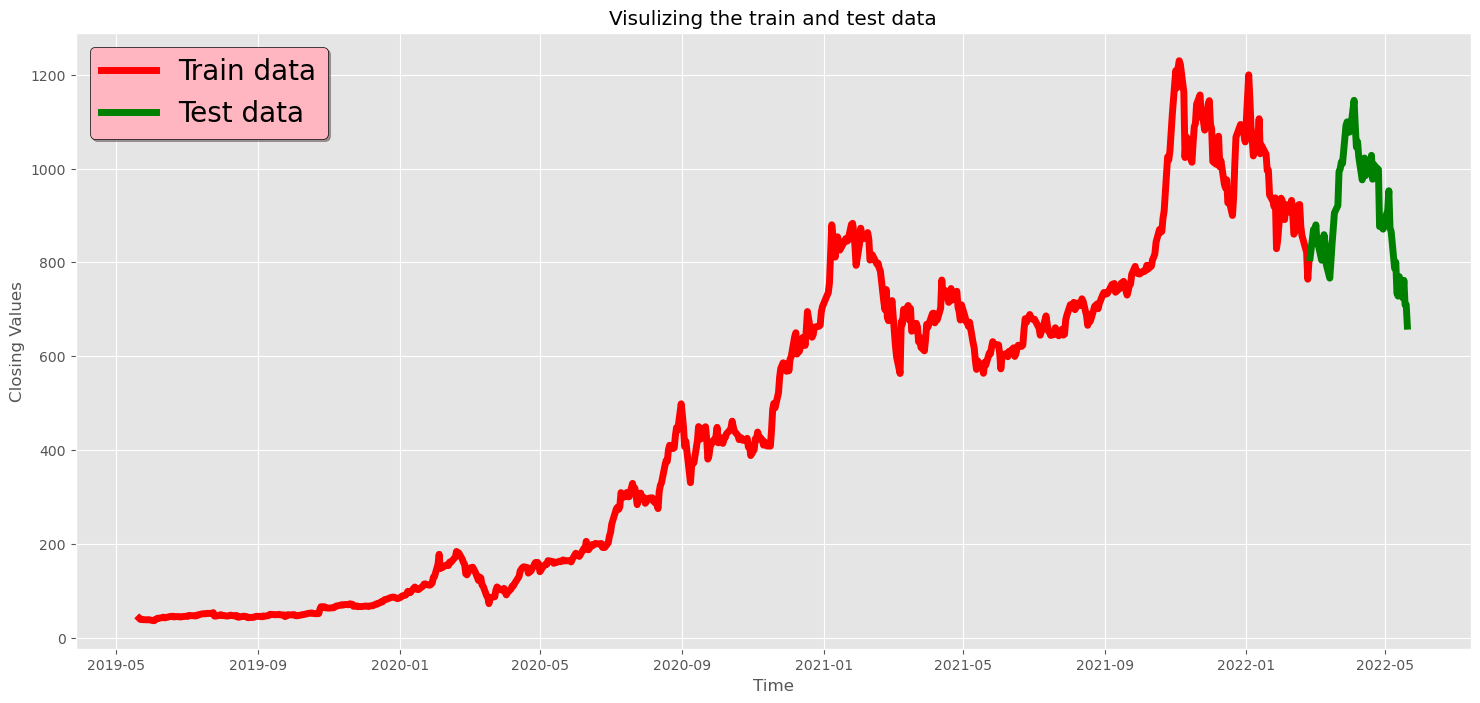

In [34]:
# split the data into train and test set 

train_data = stock_data.Close[0:-60]
test_data = stock_data.Close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)#
plt.plot(train_data , color = "red" , label = "Train data" , linewidth = 5)
plt.plot(test_data , color = "green" , label = "Test data", linewidth = 5)
plt.legend(fontsize = 20 , shadow = True , facecolor = "lightpink" , edgecolor = "k")
plt.xlabel("Time")
plt.ylabel("Closing Values")
plt.title('Visulizing the train and test data')
plt.show()

In [35]:
# importing libraries

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [36]:
history = [x for x in train_data]

In [37]:
model = ARIMA(history, order=(1,1,1))   # pdq  p = ar d = i q = me 

In [38]:
model = model.fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Thu, 07 Sep 2023   AIC                           6306.700
Time:                        01:25:40   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
model.forecast()

array([800.20438348])

In [41]:
test_data[0]

809.8699951171875

In [42]:
# mse
mean_squared_error([test_data[0] ], [model.forecast()])

93.42404838927118

In [43]:
# rmse
np.sqrt(mean_squared_error([test_data[0] ], [model.forecast()]))

9.665611640722545

In [44]:
def train_arima_model(X,y,arima_order):
# prepare training dataset
# make prediction list 

    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model  = ARIMA(history , order = arima_order)
        model_fit = model.fit()
        y_hat = model_fit.forecast()[0]
        predictions.append(y_hat)
        history.append(y[t])
    # Calculate the out of sample error 
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse



In [45]:
def evaluate_models(dataset ,test , p_values , d_values , q_values):

    dataset = dataset.astype('float32')
    best_score , best_cfg = float("inf") , None


    for p in p_values  :
        for d in d_values:
            for q in q_values:
                order = (p,d,q)

                try :
                    rmse = train_arima_model(dataset , test  , order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse , order
                    print("ARIMA%s RMAE=%.3f" %(order, rmse))
                except:
                    continue
    print("Best ARIMA%s RMAE=%.3f" %(best_cfg, best_score))

In [46]:
import warnings
warnings.filterwarnings('ignore')
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
evaluate_models(train_data , test_data , p_values , d_values , q_values)

ARIMA(0, 0, 0) RMAE=457.414
ARIMA(0, 0, 1) RMAE=241.163
ARIMA(0, 0, 2) RMAE=161.381
ARIMA(0, 1, 0) RMAE=39.516
ARIMA(0, 1, 1) RMAE=39.482
ARIMA(0, 1, 2) RMAE=39.617
ARIMA(0, 2, 0) RMAE=57.835
ARIMA(0, 2, 1) RMAE=39.611
ARIMA(0, 2, 2) RMAE=39.580
ARIMA(1, 0, 0) RMAE=39.477
ARIMA(1, 0, 1) RMAE=39.449
ARIMA(1, 0, 2) RMAE=39.584
ARIMA(1, 1, 0) RMAE=39.475
ARIMA(1, 1, 1) RMAE=39.555
ARIMA(1, 1, 2) RMAE=39.935
ARIMA(1, 2, 0) RMAE=46.184
ARIMA(1, 2, 1) RMAE=39.573
ARIMA(1, 2, 2) RMAE=39.731
ARIMA(2, 0, 0) RMAE=39.440
ARIMA(2, 0, 1) RMAE=39.494
ARIMA(2, 0, 2) RMAE=39.598
ARIMA(2, 1, 0) RMAE=39.635
ARIMA(2, 1, 1) RMAE=39.759
ARIMA(2, 1, 2) RMAE=39.685
ARIMA(2, 2, 0) RMAE=45.781
ARIMA(2, 2, 1) RMAE=39.739
ARIMA(2, 2, 2) RMAE=39.732
Best ARIMA(2, 0, 0) RMAE=39.440


In [47]:
history  = [x for x in train_data]
predictions = []
for i in range(len(test_data)):
    model = ARIMA(history , order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)[0]   # 95% confidence interval
    predictions.append(fc)
    history.append(test_data[i])
print(f"RMSE is {np.sqrt(mean_squared_error(test_data , predictions))}")

RMSE is 39.439956568889265


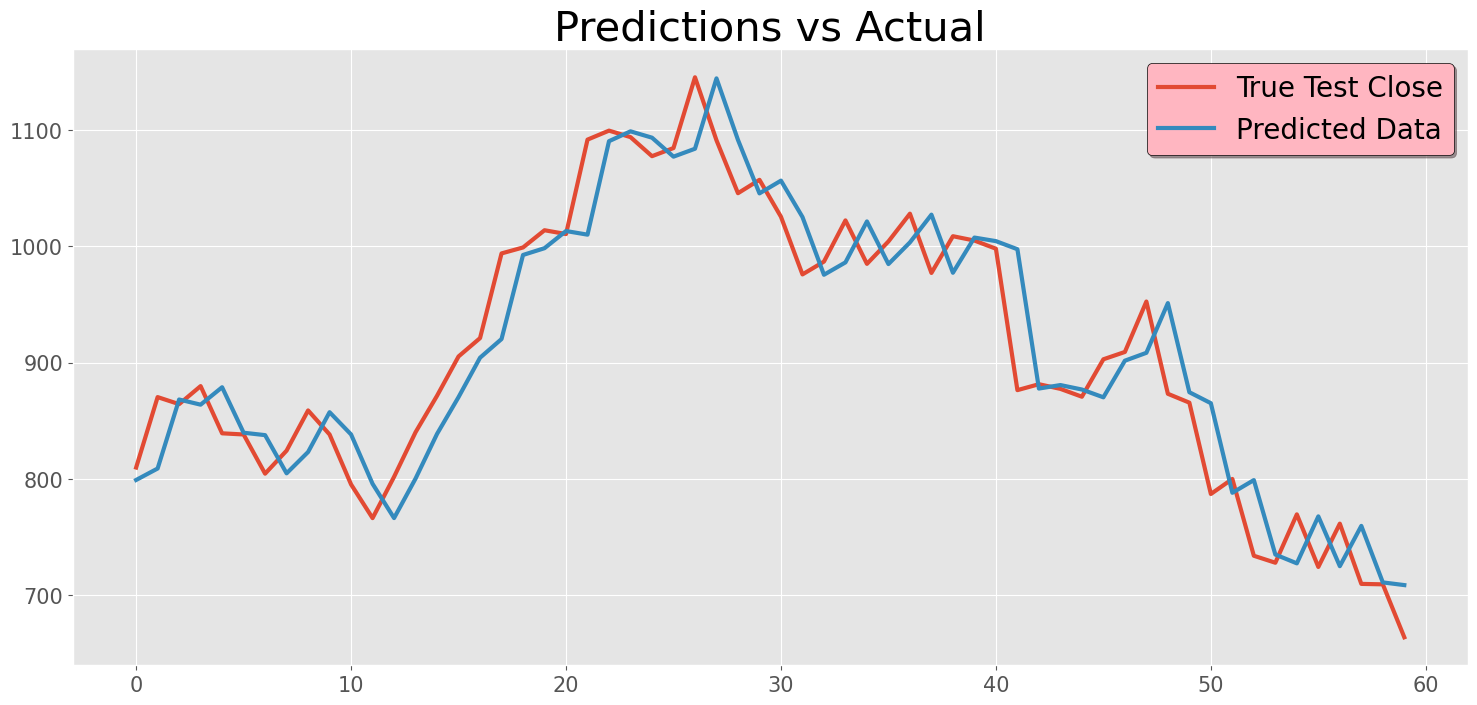

In [51]:
plt.figure(figsize=(18,8))  # fig size
plt.grid(True)     # to print grid
plt.plot(range(len(test_data)), test_data, label='True Test Close', linewidth = 3)
plt.plot(range(len(predictions)), predictions, label='Predicted Data', linewidth = 3)
plt.xticks(fontsize = 15)   #x-axis ticks font
plt.yticks(fontsize = 15)
plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.title('Predictions vs Actual', fontsize = 30)  
plt.show()

In [52]:
series = pd.Series(predictions, index = test_data.index)


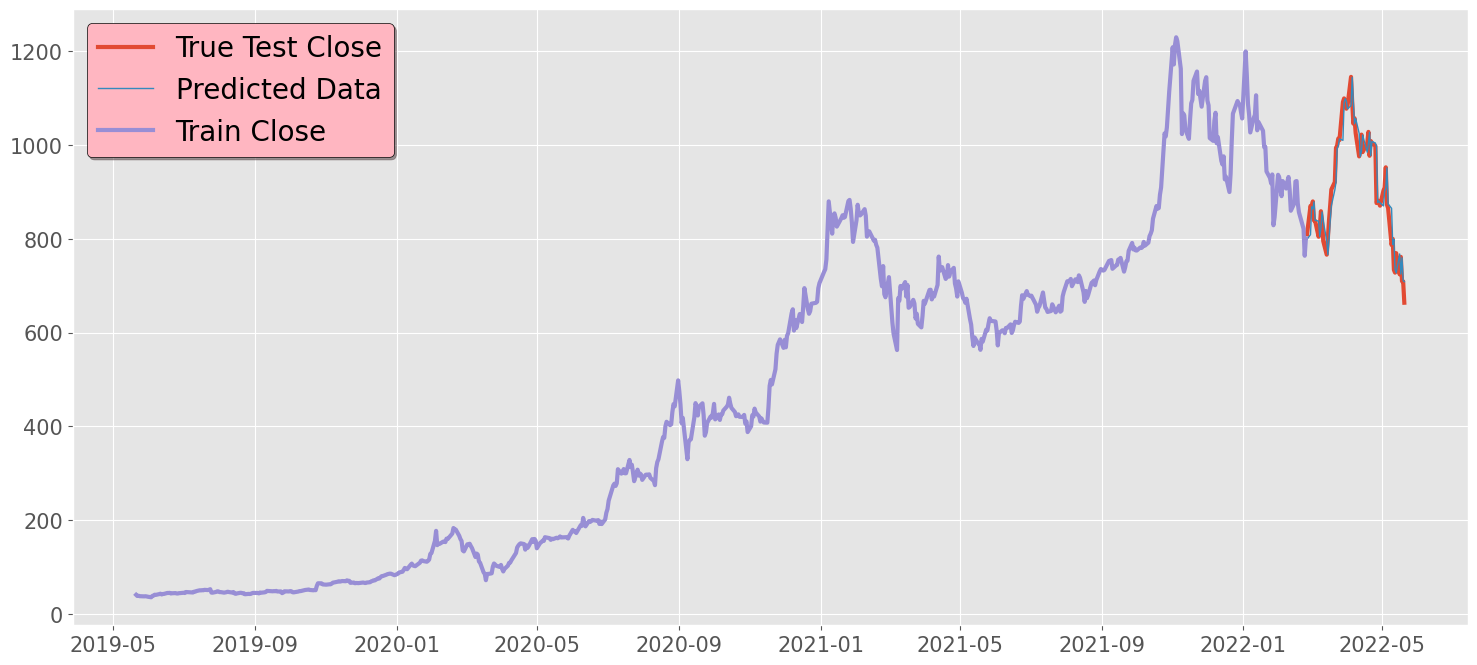

In [63]:
# plotting true test data and predicted data
plt.figure(figsize=(18,8), dpi=100)  # fig size
plt.grid(True)     # to print grid
plt.plot(test_data, label='True Test Close', linewidth = 3)
plt.plot(series, label='Predicted Data', linewidth = 1  )      
plt.plot(train_data, label='Train Close', linewidth = 3)
plt.xticks(fontsize = 15)   #x-axis ticks font
plt.yticks(fontsize = 15)
plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

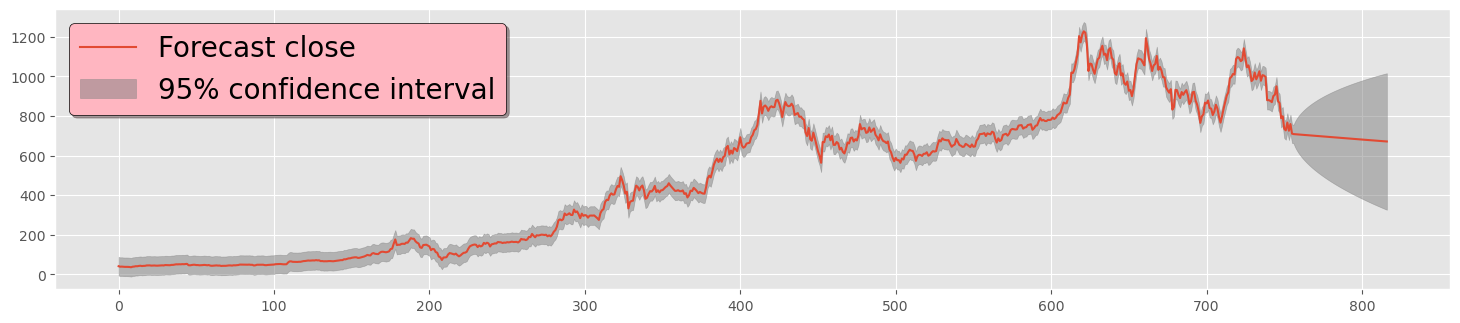

In [64]:
from statsmodels.graphics.tsaplots import plot_predict
fig  = plt.figure(figsize = (18,8)) 
ax1 = fig.add_subplot(211)  
plot_predict(model_fit, start = 1 , end = len(df_close)+60 , ax = ax1)
plt.legend(["Forecast " "close" , "95% confidence interval"] , fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k') 

In [65]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 39.73948215711439


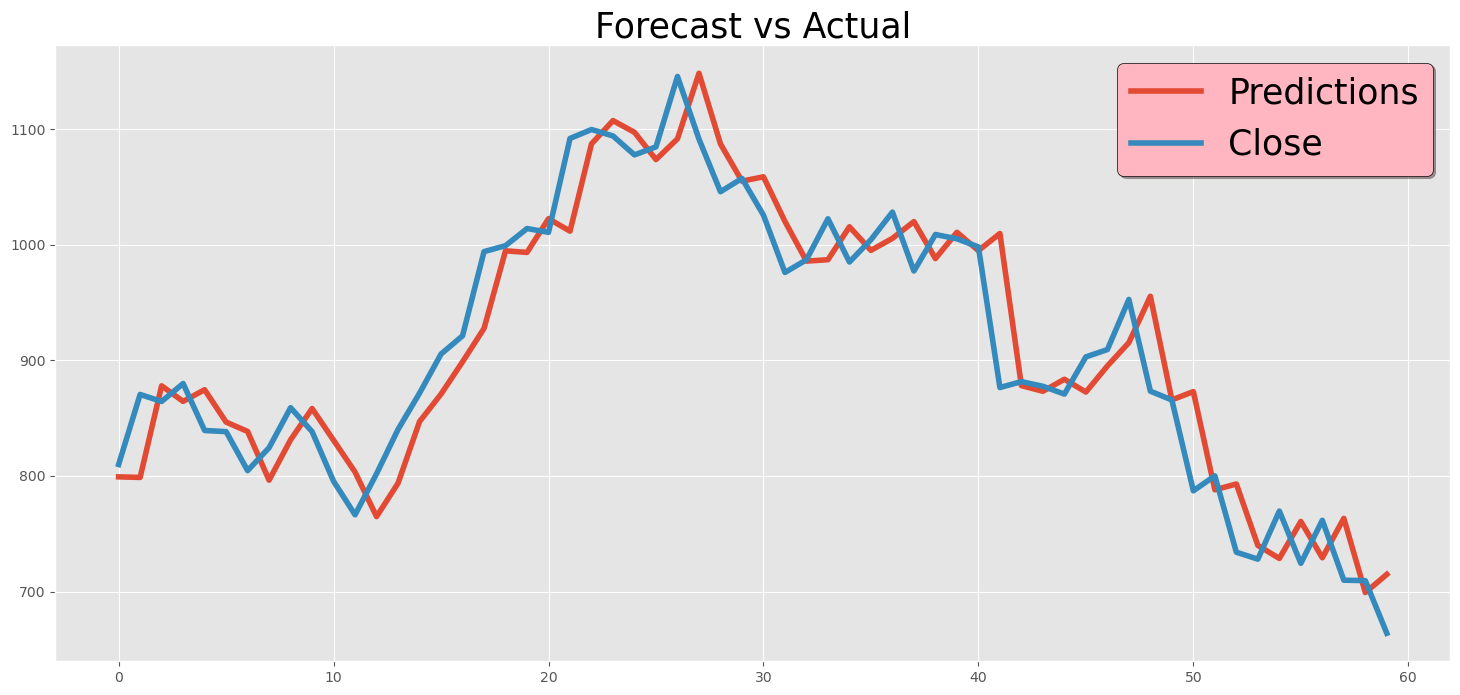

In [66]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

RMSE is 39.44284984486429


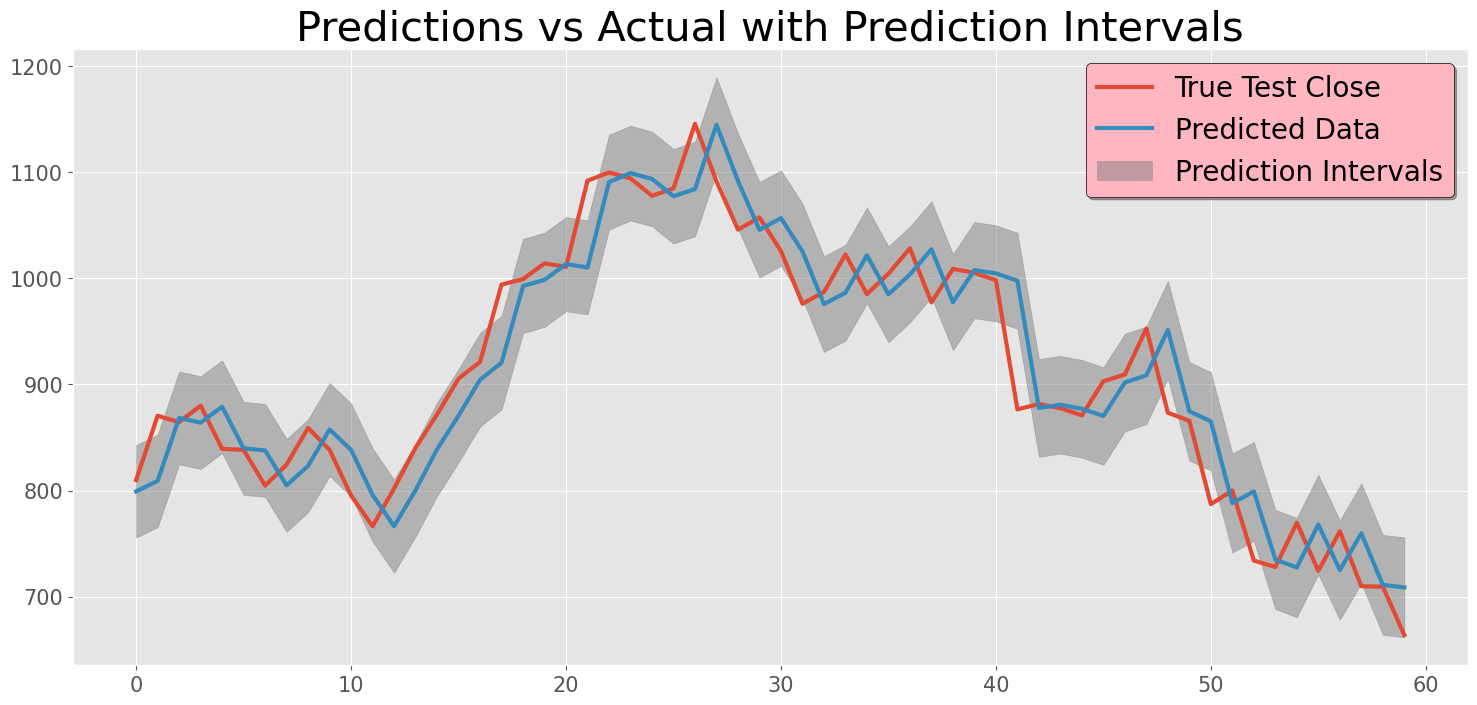

In [49]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have defined your train_data and test_data here

history = [x for x in train_data]
predictions  = []  # To store the prediction made on test data .....
lower_limits = []  # To store lower bounds of prediction intervals .....
upper_limits = []  # To store upper bounds of prediction intervals .....

# Loop over the test data and obtain predictions
for i in range(len(test_data)):
    model = SARIMAX(history, order=(2, 0, 0))
    model_fit = model.fit(disp=0)
    
    #Forecast 1 step ahead
    fc = model_fit.forecast(steps=1)
    
    #Get the standard error of the forecast
    se = model_fit.get_prediction(start=len(history), end=len(history), dynamic=False).se_mean
    
    #Calculate prediction intervals
    lower_limit = fc - 1.96 * se  # 95% prediction interval
    upper_limit = fc + 1.96 * se
    
    #Append the forecast and prediction intervals
    predictions.append(fc[0])
    lower_limits.append(lower_limit[0])
    upper_limits.append(upper_limit[0])
    
    history.append(test_data[i])

#Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"RMSE is {rmse}")

#Plotting
plt.figure(figsize=(18, 8))
plt.grid(True)
plt.plot(range(len(test_data)), test_data, label='True Test Close', linewidth=3)
plt.plot(range(len(predictions)), predictions, label='Predicted Data', linewidth=3)
plt.fill_between(range(len(predictions)), lower_limits, upper_limits, color='gray', alpha=0.5, label='Prediction Intervals')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best', fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')
plt.title('Predictions vs Actual with Prediction Intervals', fontsize=30)
plt.show()

